In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bureau_Balance

- Monthly blances of previous credits in Credit Bureau
- This table has one row for each month of history of every previous credit reported to Credit Bureau i.e the table has (#loans in sample # of relative previous credits # months where we have some history observable for the previous credits) rows 

In [3]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [4]:
bureau_balance.shape

(27299925, 3)

In [5]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [6]:
bureau_balance.duplicated().sum()

0

In [7]:
bureau_balance.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

In [8]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [9]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat ([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [10]:
missing_value(bureau_balance)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [11]:
bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

### STATUS

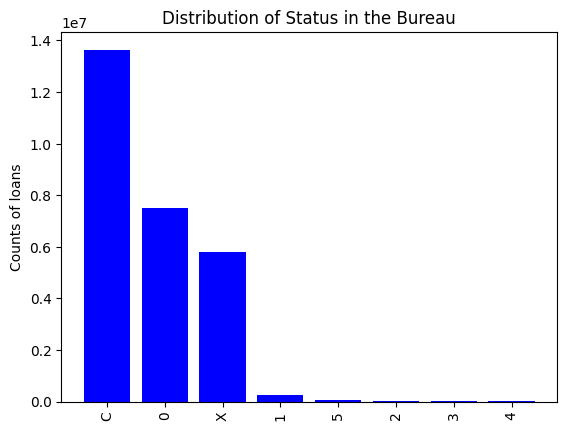

In [12]:
status_dict = dict(bureau_balance['STATUS'].value_counts())
status_dict

sorted_status_dict = dict(sorted(status_dict.items(), key = lambda kv :kv[1],reverse = True))
ind_2 = np.arange(len(sorted_status_dict))

p1 = plt.bar(ind_2, list(sorted_status_dict.values()), color = 'blue')

plt.ylabel('Counts of loans')
plt.title('Distribution of Status in the Bureau')
plt.xticks(ind_2, list(sorted_status_dict.keys()), rotation = 90)
plt.show()

#### Comment:
- Most of the loans are closed in the Credit Bureau, which is followed by clients with 0 DPD and then by applicants whose status is unknown
- We can conclide that there are very few annuity defaulters in the data

<Figure size 1300x800 with 0 Axes>

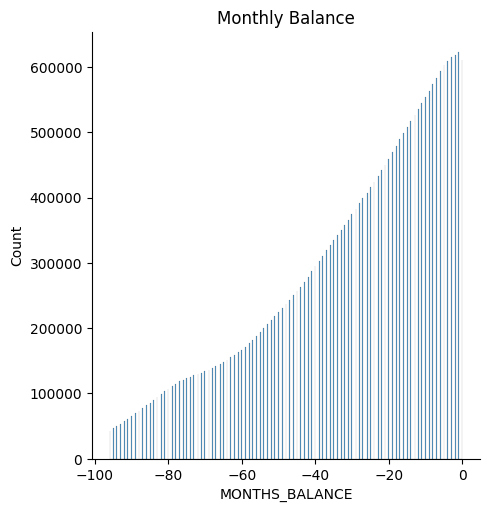

In [13]:
plt.figure(figsize = (13,8))
ax = sns.displot(bureau_balance['MONTHS_BALANCE'])
plt.title('Monthly Balance')
plt.show()


In [14]:
application_train = pd.read_csv('application_train.csv')
application_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
bureau = pd.read_csv('bureau.csv')
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [16]:
data_bureau_merge_balance = pd.merge(bureau[['SK_ID_CURR','SK_ID_BUREAU']], bureau_balance, how= 'left', on=['SK_ID_BUREAU'])
data_bureau_merge_balance.head()

,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,215354,5714462,NaN,NaN
1,215354,5714463,NaN,NaN
2,215354,5714464,NaN,NaN
3,215354,5714465,NaN,NaN
4,215354,5714466,NaN,NaN


In [17]:
data_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]],data_bureau_merge_balance , how='left', on=['SK_ID_CURR'])
data_merged.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,100002,1,6158904.0,-15.0,C
1,100002,1,6158904.0,-16.0,C
2,100002,1,6158904.0,-17.0,0
3,100002,1,6158904.0,-18.0,0
4,100002,1,6158904.0,-19.0,0


In [18]:
group = data_merged[['SK_ID_CURR', 'STATUS', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['STATUS'].nunique().reset_index()
group

,SK_ID_CURR,TARGET,STATUS
0,100002,1,4
1,100003,0,0
2,100004,0,0
3,100006,0,0
4,100007,0,0
...,...,...,...
307506,456251,0,0
307507,456252,0,0
307508,456253,0,3
307509,456254,1,2


[Text(0.5, 1.0, 'defaulter')]

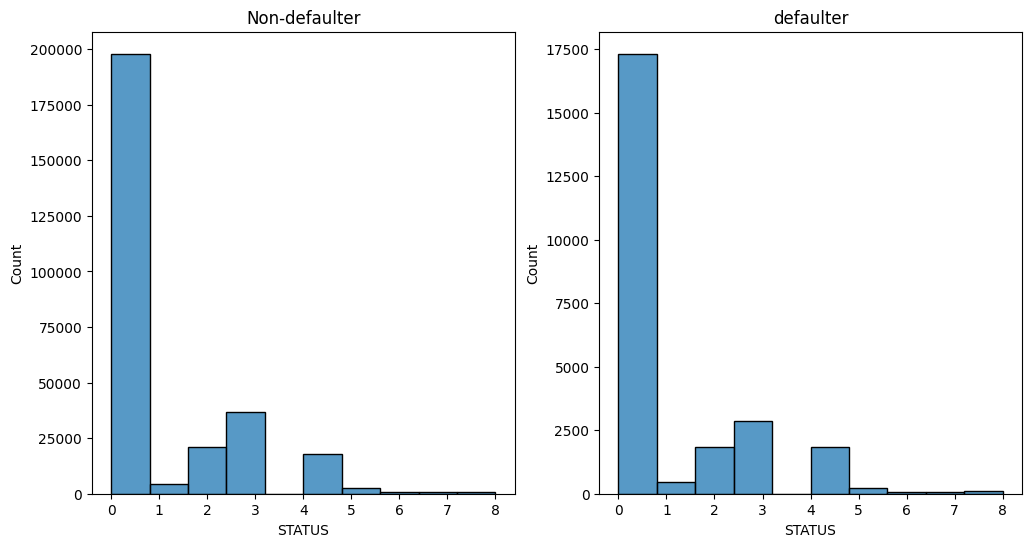

In [21]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(group[group["TARGET"] == 0]["STATUS"], ax= ax[0], bins=10).set(title = "Non-defaulter")
sns.histplot(group[group["TARGET"] == 1]["STATUS"], ax= ax[1], bins=10).set(title = "defaulter")

### We see a same trend in status both in defaulter and non defaulter

In [23]:
group2 = data_merged[['SK_ID_CURR', 'MONTHS_BALANCE', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['MONTHS_BALANCE'].nunique().reset_index()
group2

,SK_ID_CURR,TARGET,MONTHS_BALANCE
0,100002,1,48
1,100003,0,0
2,100004,0,0
3,100006,0,0
4,100007,0,0
...,...,...,...
307506,456251,0,0
307507,456252,0,0
307508,456253,0,31
307509,456254,1,37


<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='Count'>

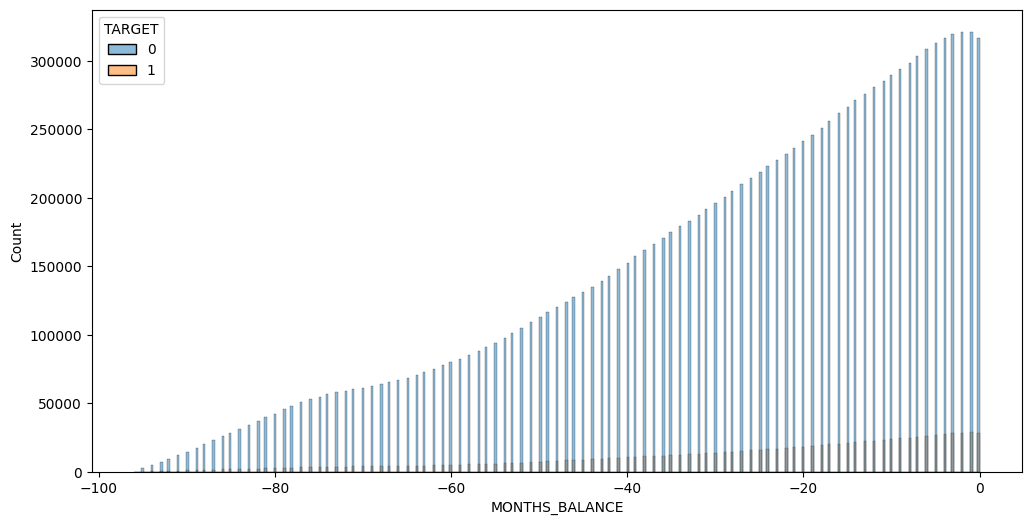

In [27]:
fig, ax = plt.subplots(figsize= (12,6))
sns.histplot(data = data_merged, x = 'MONTHS_BALANCE', hue = 'TARGET')